In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pprint

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, auc, confusion_matrix, roc_curve, classification_report

# Supervised Learning

## Dataset for supervised learning

In [2]:
dataset_sup = pd.read_csv('imdb_sup_clean.csv')

In [3]:
dataset_sup

,review,label,clean_review,join_clean_review
0,Not even the Beatles could write songs everyon...,0,"['even', 'beatl', 'could', 'write', 'song', 'e...",even beatl could write song everyon like altho...
1,This German horror film has to be one of the w...,0,"['german', 'horror', 'film', 'one', 'weirdest'...",german horror film one weirdest seen awar conn...
2,Cage plays a drunk and gets high critically pr...,0,"['cage', 'play', 'drunk', 'get', 'high', 'crit...",cage play drunk get high critic prais elizabet...
3,Here's a decidedly average Italian post apocal...,0,"['decid', 'averag', 'italian', 'post', 'apocal...",decid averag italian post apocalypt take hunt ...
4,I'm a huge fan of both Emily Watson (Breaking ...,0,"['huge', 'fan', 'emili', 'watson', 'break', 'w...",huge fan emili watson break wave tom wilkinson...
...,...,...,...,...
11225,I saw this movie last night after waiting ages...,1,"['saw', 'movi', 'last', 'night', 'wait', 'age'...",saw movi last night wait age age releas canada...
11226,I was very moved by the story and because I am...,1,"['move', 'stori', 'go', 'someth', 'similar', '...",move stori go someth similar parent realli con...
11227,This is a really interesting movie. It is an a...,1,"['realli', 'interest', 'movi', 'action', 'movi...",realli interest movi action movi comedi mix fo...
11228,This is the kind of film you want to see with ...,1,"['kind', 'film', 'want', 'see', 'glass', 'wine...",kind film want see glass wine fire feet requir...


If the label is 0, then the review is negative. On the other hand, if the label is 1, the review is positive. 

In [4]:
dataset_sup['clean_review'].apply(lambda x : len(x)).describe()

count    11230.000000
mean      1071.204541
std        816.106214
min         37.000000
25%        568.000000
50%        790.000000
75%       1302.000000
max      10721.000000
Name: clean_review, dtype: float64

On average, we will have around 1070 features. So we can choose to vectorise with the top 1500 features.

## Train/Test split

In [5]:
X = dataset_sup['join_clean_review']
Y = dataset_sup['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1998)

## Defining the pipelines

We chose to explore three different regression models: RandomForest, Logistic Regression, and SVC

In [6]:
pipelines = {
    'rf_pipe': Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=1500)),
    ('rf', RandomForestClassifier(n_estimators=400, random_state=42)),
    ]),

    'log_reg_pipe': Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=1500)),
    ('log_reg', LogisticRegression())
    ]),

    'svc_pipe': Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=1500)),
    ('svc', SVC())
    ]),
}

## Fitting the models

In [7]:
pipelines['rf_pipe'].fit(X_train, Y_train)
Y_pred_rf = pipelines['rf_pipe'].predict(X_test)

pipelines['log_reg_pipe'].fit(X_train, Y_train)
Y_pred_log_reg = pipelines['log_reg_pipe'].predict(X_test)

pipelines['svc_pipe'].fit(X_train, Y_train)
Y_pred_svc = pipelines['svc_pipe'].predict(X_test)

In [8]:
target_names = ['neg', 'pos']

In [9]:
print('classification report for random forest')
print(classification_report(Y_test, Y_pred_rf, target_names=target_names))

classification report for random forest
              precision    recall  f1-score   support

         neg       0.85      0.83      0.84      1132
         pos       0.83      0.85      0.84      1114

    accuracy                           0.84      2246
   macro avg       0.84      0.84      0.84      2246
weighted avg       0.84      0.84      0.84      2246



In [10]:
print('classification report for logistic regression')
print(classification_report(Y_test, Y_pred_log_reg, target_names=target_names))

classification report for logistic regression
              precision    recall  f1-score   support

         neg       0.89      0.83      0.86      1132
         pos       0.84      0.89      0.86      1114

    accuracy                           0.86      2246
   macro avg       0.86      0.86      0.86      2246
weighted avg       0.86      0.86      0.86      2246



In [11]:
print('classification report for SVC')
print(classification_report(Y_test, Y_pred_svc, target_names=target_names))

classification report for SVC
              precision    recall  f1-score   support

         neg       0.88      0.82      0.85      1132
         pos       0.83      0.89      0.86      1114

    accuracy                           0.86      2246
   macro avg       0.86      0.86      0.86      2246
weighted avg       0.86      0.86      0.86      2246



## Tuning the hyperparameters

In [12]:
parameters = {
    'rf_pipe': {'rf__n_estimators': [100, 400, 800],
                'rf__min_samples_split': [2, 6, 12],
                'rf__max_features': ['auto',5 ,10, 20]},
    'log_reg_pipe': {'log_reg__penalty': ['l2', 'none'],
                     'log_reg__max_iter': [100, 500]},
    
    'svc_pipe': {'svc__kernel' : ['poly', 'rbf'],
                 'svc__degree': [2, 3, 4],
                 'svc__probability': [True]}
}

In [13]:
best_parameters = {}
best_estimators = {}
best_scores = {}
cv_results = {}

In [14]:
for model_name, pipe in pipelines.items():
    grid = GridSearchCV(pipe, param_grid=parameters[model_name], scoring='roc_auc')
    grid.fit(X_train, Y_train)
    best_parameters[model_name] = grid.best_params_
    best_estimators[model_name] = grid.best_estimator_
    best_scores[model_name] = grid.best_score_
    cv_results[model_name] = grid.cv_results_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [15]:
best_parameters

{'rf_pipe': {'rf__max_features': 5,
  'rf__min_samples_split': 12,
  'rf__n_estimators': 800},
 'log_reg_pipe': {'log_reg__max_iter': 100, 'log_reg__penalty': 'l2'},
 'svc_pipe': {'svc__degree': 2, 'svc__kernel': 'rbf'}}

In [16]:
best_estimators

{'rf_pipe': Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=1500)),
                 ('rf',
                  RandomForestClassifier(max_features=5, min_samples_split=12,
                                         n_estimators=800, random_state=42))]),
 'log_reg_pipe': Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=1500)),
                 ('log_reg', LogisticRegression())]),
 'svc_pipe': Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=1500)),
                 ('svc', SVC(degree=2))])}

In [17]:
best_scores

{'rf_pipe': 0.9307895270422119,
 'log_reg_pipe': 0.9372300152522246,
 'svc_pipe': 0.937411731686343}

In [18]:
pd.DataFrame(cv_results)

,rf_pipe,log_reg_pipe,svc_pipe
mean_fit_time,"[6.867249536514282, 27.346450996398925, 53.870...","[0.6951305389404296, 0.8488523006439209, 0.812...","[26.321758604049684, 20.40815052986145, 29.514..."
std_fit_time,"[0.0343925051308058, 0.2131486699008946, 0.269...","[0.01656421687016967, 0.08516371535558383, 0.0...","[0.24268422978636783, 1.039839580904577, 1.005..."
mean_score_time,"[0.1961371898651123, 0.37720041275024413, 0.60...","[0.14488043785095214, 0.15645689964294435, 0.1...","[6.344286584854126, 5.5344651222229, 8.6963338..."
std_score_time,"[0.0037508627577065847, 0.005665001453850483, ...","[0.001758113711773036, 0.015989767698749824, 0...","[0.039412074730831935, 0.03441742331537648, 1...."
param_rf__max_features,"[auto, auto, auto, auto, auto, auto, auto, aut...",NaN,NaN
param_rf__min_samples_split,"[2, 2, 2, 6, 6, 6, 12, 12, 12, 2, 2, 2, 6, 6, ...",NaN,NaN
param_rf__n_estimators,"[100, 400, 800, 100, 400, 800, 100, 400, 800, ...",NaN,NaN
params,"[{'rf__max_features': 'auto', 'rf__min_samples...","[{'log_reg__max_iter': 100, 'log_reg__penalty'...","[{'svc__degree': 2, 'svc__kernel': 'poly'}, {'..."
split0_test_score,"[0.9180351124987609, 0.9236619090098126, 0.924...","[0.9397524531668152, 0.8940430171473881, 0.939...","[0.9367231638418079, 0.9400460898007731, 0.921..."
split1_test_score,"[0.9192908117752007, 0.9267475716126474, 0.928...","[0.9450874715036178, 0.8977797601348002, 0.945...","[0.945327832292596, 0.9445435622955693, 0.9368..."


## Evaluating the models

In [19]:
best_estimators['rf_pipe'].fit(X_train, Y_train)
Y_pred_rf = best_estimators['rf_pipe'].predict(X_test)

best_estimators['log_reg_pipe'].fit(X_train, Y_train)
Y_pred_log_reg = best_estimators['log_reg_pipe'].predict(X_test)

best_estimators['svc_pipe'].fit(X_train, Y_train)
Y_pred_svc = best_estimators['svc_pipe'].predict(X_test)

In [20]:
print('classification report for random forest')
print(classification_report(Y_test, Y_pred_rf, target_names=target_names))

classification report for random forest
              precision    recall  f1-score   support

         neg       0.87      0.82      0.84      1132
         pos       0.83      0.87      0.85      1114

    accuracy                           0.85      2246
   macro avg       0.85      0.85      0.85      2246
weighted avg       0.85      0.85      0.85      2246



In [21]:
print('classification report for logistic regression')
print(classification_report(Y_test, Y_pred_log_reg, target_names=target_names))

classification report for logistic regression
              precision    recall  f1-score   support

         neg       0.89      0.83      0.86      1132
         pos       0.84      0.89      0.86      1114

    accuracy                           0.86      2246
   macro avg       0.86      0.86      0.86      2246
weighted avg       0.86      0.86      0.86      2246



In [22]:
print('classification report for SVC')
print(classification_report(Y_test, Y_pred_svc, target_names=target_names))

classification report for SVC
              precision    recall  f1-score   support

         neg       0.88      0.82      0.85      1132
         pos       0.83      0.89      0.86      1114

    accuracy                           0.86      2246
   macro avg       0.86      0.86      0.86      2246
weighted avg       0.86      0.86      0.86      2246



<AxesSubplot:title={'center':'Random Forest'}>

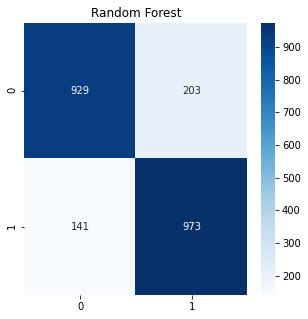

In [23]:
cm_rdf = pd.DataFrame(confusion_matrix(Y_test, Y_pred_rf))
plt.figure(figsize = (5,5))
plt.title('Random Forest')
sn.heatmap(cm_rdf, annot=True, cmap = 'Blues', fmt='g')

<AxesSubplot:title={'center':'SVC'}>

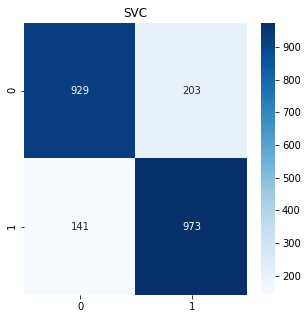

In [24]:
cm_svc = pd.DataFrame(confusion_matrix(Y_test, Y_pred_rf))
plt.figure(figsize = (5,5))
plt.title('SVC')
sn.heatmap(cm_rdf, annot=True, cmap = 'Blues', fmt='g')

<AxesSubplot:title={'center':'Logistic Regression'}>

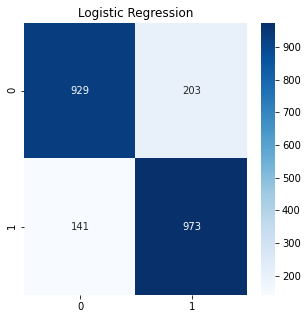

In [25]:
cm_log_reg = pd.DataFrame(confusion_matrix(Y_test, Y_pred_rf))
plt.figure(figsize = (5,5))
plt.title('Logistic Regression')
sn.heatmap(cm_rdf, annot=True, cmap = 'Blues', fmt='g')

## Visualising ROC/AUC for each model

In [26]:
print('roc_auc_score random forest :', roc_auc_score(Y_test, Y_pred_rf))
print('roc_auc_score logistic regression :', roc_auc_score(Y_test, Y_pred_log_reg))
print('roc_auc_score SVC :', roc_auc_score(Y_test, Y_pred_svc))

roc_auc_score random forest : 0.8470502312362416
roc_auc_score logistic regression : 0.8608926860833213
roc_auc_score SVC : 0.8564614511105048


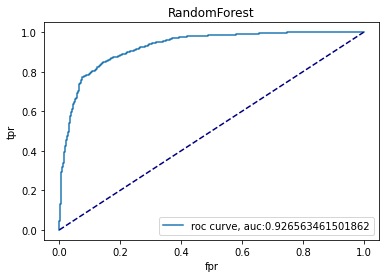

In [29]:
fpr, tpr, threshold = roc_curve(Y_test, best_estimators['rf_pipe'].predict_proba(X_test)[:,1])
auc(fpr,tpr)

plt.plot(fpr,tpr,label='roc curve, auc:'+str(auc(fpr,tpr)))
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.title('RandomForest')
plt.show()

In [41]:
pipe_svc_prob_true = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=1500)),
    ('svc', SVC(probability=True, degree=2, kernel='rbf')),
    ])
pipe_svc_prob_true.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=1500)),
                ('svc', SVC(degree=2, probability=True))])

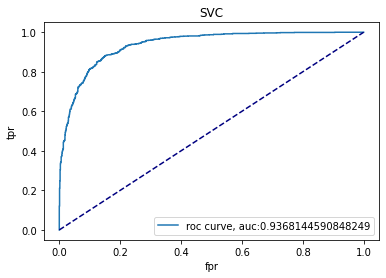

In [42]:
fpr, tpr, threshold = roc_curve(Y_test, pipe_svc_prob_true.predict_proba(X_test)[:,1])
auc(fpr,tpr)

plt.plot(fpr,tpr,label='roc curve, auc:'+str(auc(fpr,tpr)))
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.title('SVC')
plt.show()

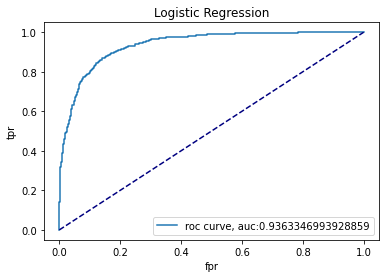

In [40]:
fpr, tpr, threshold = roc_curve(Y_test, best_estimators['log_reg_pipe'].predict_proba(X_test)[:,1])
auc(fpr,tpr)

plt.plot(fpr,tpr,label='roc curve, auc:'+str(auc(fpr,tpr)))
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.title('Logistic Regression')
plt.show()

To conclude, we will choose the logistic regression model. Since all three models have similar scores, in particular the support vector classifier and the logistic regression model. We want to choose the model that is the most convenient in terms of computational complexity and implementation.